# Sentiment Analysis of IMDB reviews

## Importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB Dataset.csv')
df.head()

df = df.sample(5000)         # original data contains 50,000 rows. Randomly chose 5000 rows for teaching purpose.
# #df = df.iloc[0:5000,:]

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,NaN,2514
1,NaN,2486


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [ ]:
df['review']

2247    That is the answer. The question is: What is t...
4128    I was looking forward to this flick. Being an ...
8749    I like underdogs. So, 12 years after having fi...
9945    The four LA cops in fedoras driving around in ...
1135    This is a very unusual film in that the star w...
                              ...                        
1418    There are two kinds of 1950s musicals. First y...
909     I had never seen a film by John Cassavetes up ...
2022    Watching John Cassavetes film, Opening Night, ...
3100    Having not seen this film in about 20 years I ...
3593    A remarkable piece of documentary, giving a vi...
Name: review, Length: 5000, dtype: object

In [ ]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")   # ^ is not symbol

# Re ordering columns
df = df[['review','review_processed','sentiment']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['review_processed']

2247    That is the answer  The question is  What is t...
4128    I was looking forward to this flick  Being an ...
8749    I like underdogs  So  12 years after having fi...
9945    The four LA cops in fedoras driving around in ...
1135    This is a very unusual film in that the star w...
                              ...                        
1418    There are two kinds of 1950s musicals  First y...
909     I had never seen a film by John Cassavetes up ...
2022    Watching John Cassavetes film  Opening Night  ...
3100    Having not seen this film in about 20 years I ...
3593    A remarkable piece of documentary  giving a vi...
Name: review_processed, Length: 5000, dtype: object

#### Replacing short words
* deleting words whose length is <= 2
* this removes html tags also

In [ ]:
' '.join(["this", "batch" , "is", "awesome"])

'this batch is awesome'

In [ ]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

.apply():
  * the function is applied for all the rows. ('lambda') 
  * 'x' is a row
  * 'x.split' will split the row into words.
  * if word_length>2, join it. otherwise don't.

In [ ]:
df['review_processed']

2247    That the answer The question What the single r...
4128    was looking forward this flick Being old Rober...
8749    like underdogs years after having first seen S...
9945    The four cops fedoras driving around big black...
1135    This very unusual film that the star with the ...
                              ...                        
1418    There are two kinds 1950s musicals First you h...
909     had never seen film John Cassavetes until two ...
2022    Watching John Cassavetes film Opening Night wa...
3100    Having not seen this film about years still im...
3593    remarkable piece documentary giving vivid depi...
Name: review_processed, Length: 5000, dtype: object

#### LowerCase character

In [ ]:
"kousik" == "Kousik"

False

In [ ]:
word = "Kousik"
word.lower()

'kousik'

In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
df['review_processed']

2247    that the answer the question what the single r...
4128    was looking forward this flick being old rober...
8749    like underdogs years after having first seen s...
9945    the four cops fedoras driving around big black...
1135    this very unusual film that the star with the ...
                              ...                        
1418    there are two kinds 1950s musicals first you h...
909     had never seen film john cassavetes until two ...
2022    watching john cassavetes film opening night wa...
3100    having not seen this film about years still im...
3593    remarkable piece documentary giving vivid depi...
Name: review_processed, Length: 5000, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


# Making custom list of stopwords to be removed 
add_words = ['movie','film','one','make','even']

# Adding to the list of stopwords
stopw_words = stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['review_processed']

2247    answer question single reason watch loved name...
4128    looking forward flick old robert howard fan ma...
8749    like underdogs years first seen star trek thin...
9945    four cops fedoras driving around big black con...
1135    unusual star top billing appear literally half...
                              ...                        
1418    two kinds 1950s musicals first glossy mgm prod...
909     never seen john cassavetes two years ago first...
2022    watching john cassavetes opening night reminde...
3100    seen years still impressed hard hitting impact...
3593    remarkable piece documentary giving vivid depi...
Name: review_processed, Length: 5000, dtype: object

#### POS tagging + Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    # detailed pos
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)  # calls the function  # shallow pos
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:  
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))     # apply lemmatisation
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


* 1) split sentence into words
* 2) get the detailed POS for each word
* 3) get shallow POS from detailed POS
* 4) do lemmatisation for each word
* 5) join all the words to form sentence 

In [ ]:
df['review_processed']

2247    answer question single reason watch love name ...
4128    look forward flick old robert howard fan mainl...
8749    like underdog year first see star trek think b...
9945    four cop fedoras drive around big black conver...
1135    unusual star top billing appear literally half...
                              ...                        
1418    two kind 1950s musical first glossy mgm produc...
909     never see john cassavetes two year ago first s...
2022    watch john cassavetes open night remind someth...
3100    see year still impress hard hit impact stellar...
3593    remarkable piece documentary give vivid depict...
Name: review_processed, Length: 5000, dtype: object

#### Plotting Freqent Words

In [ ]:
df

,review,review_processed,sentiment
5870,For Native Mongolian speakers the film lacked ...,native mongolian speaker lack emotion emphasis...,negative
526,Seven Ups has been compared to Bullitt for the...,seven ups compare bullitt chase scene come any...,positive
3400,This is high grade cheese fare of B movie kung...,high grade cheese fare kung flick bruce wannab...,negative
9083,I was very happy and at the same time quite su...,happy time quite surprised positive comment wr...,positive
1683,The name (Frau) of the main character is the G...,name frau main character german word woman kno...,negative
...,...,...,...
9261,Move over Manos. Back off Boogens. It doesn't ...,move manos back boogens take baby genius know ...,negative
163,"This is one of a rarity of movies, where inste...",rarity movie instead bowl popcorn watch bottle...,negative
1841,I agree with the other comments. I saw this mo...,agree comment saw year ago christopher plummer...,positive
8285,There is so much to love in this darling littl...,much love darling little comedy anyone ever bu...,positive


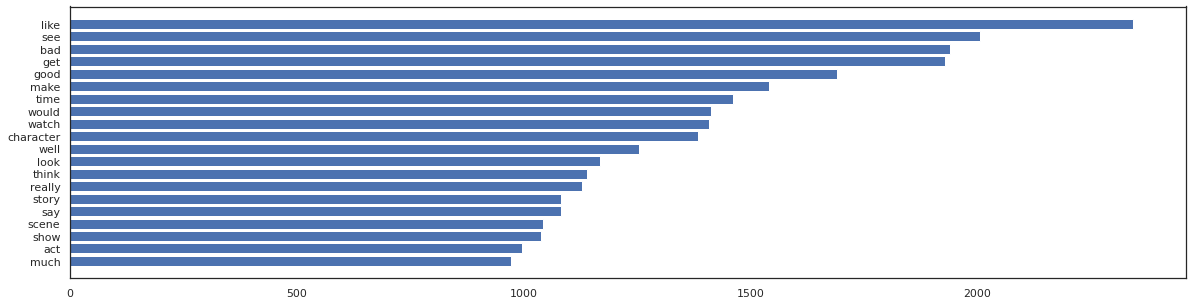

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'negative',:]    # also negative

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud
  * for plotting purpose (EDA)

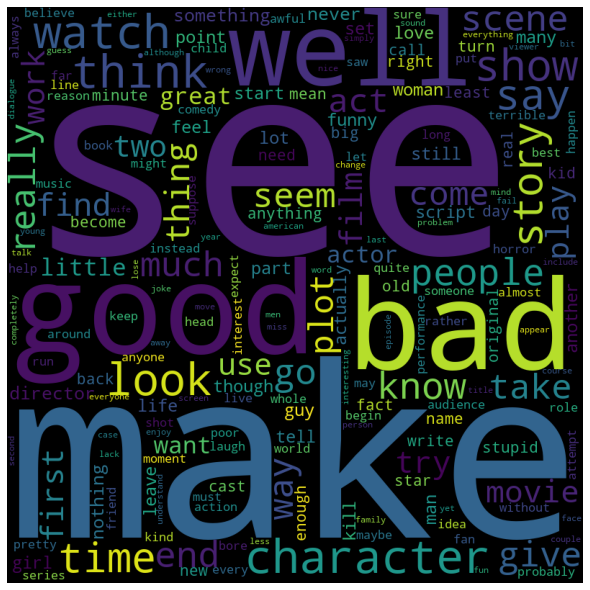

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)       # only top 2500 words  # by default 1-gram
X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((4000, 2500), (1000, 2500))

## Building the ML model
  * usually gaussian naive bayes works well with NLP.

In [ ]:
## Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[416 113]
 [121 350]]
The model accuracy is 0.766


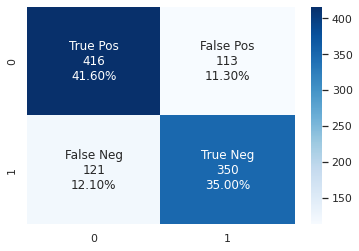

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.8129427393752584

## Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



0.697

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
8,0.213739,bad
133,0.068007,waste
50,0.045752,great
6,0.038091,awful
35,0.030232,excellent
...,...,...
26,0.001285,notch
93,0.001233,produce
41,0.001156,two
84,0.001028,union
